# Julia 數值系統介紹

Julia 數值系統型別 (Type) 階層，其最上層的父型別是 `Any`，也是 Julia 所有型別的父型別。數值系統的最上層父型別為 `Number`。

![](./Julia_Number.png)

## 1. 整數 (Integer)

整數是數值系統中最基本的型別，分為有正負號 (signed) 與無正負號 (unsigned) 整數型別，其最大和最小值也不同。

|是否有正負號|型別|<div style="width:120px">最大值</div>|<div style="width:120px">最小值</div>|
|---|---|---|---|
|有|Int128, Int64, Int32, Int16, Int8|$2^{位元數-1}-1$|$-2^{位元數-1}$|
|無|UInt128, UInt64, UInt32, UInt16, UInt8|$2^{位元數}-1$|$0$|


### 1.1 範圍

下面範例是呼叫 `typemax()` 與 `typemin()` 函式查看 Int64 型別的最大值和最小值。

In [4]:
println("$(rpad(Int64,7)): 最小值 $(typemin(Int64)), 最大值 $(typemax(Int64))")

Int64  : 最小值 -9223372036854775808, 最大值 9223372036854775807


`BigInt` 型別是任意精度 (Arbitrary Precision)，若要呼叫 `typemax()` 或 `typemin()` 則會產生錯誤。

In [5]:
typemax(BigInt)

MethodError: MethodError: no method matching typemax(::Type{BigInt})
Closest candidates are:
  typemax(!Matched::Type{Bool}) at bool.jl:7
  typemax(!Matched::Type{Int8}) at int.jl:652
  typemax(!Matched::Type{UInt8}) at int.jl:654
  ...

In [6]:
typemin(BigInt)

MethodError: MethodError: no method matching typemin(::Type{BigInt})
Closest candidates are:
  typemin(!Matched::Type{Bool}) at bool.jl:6
  typemin(!Matched::Type{Int8}) at int.jl:651
  typemin(!Matched::Type{UInt8}) at int.jl:653
  ...

### 1.2 使用與宣告變數

Julia 會自動判斷適用的整數值型別，十進位的值會自動指定為有正負號的整數，預設的位數是以作業系統位元數為準，例如 64 位元的作業系統就會自動採用 `Int64` 型別。(註: 在不影響位元數的情況下，也就是未超過型別的最大值，且未指定型別。)

若超過 `Int64` 最大值時，Julia 會自動判斷並將型別定為 `Int128`。

In [7]:
# 查看內部變數 Sys.WORD_SIZE，顯示作業系統為 32-bit 或 64-bit。
Sys.WORD_SIZE

64

In [8]:
x = 3
typeof(x)

Int64

使用 `length()` 加上 `bitstring()` 函式可以看到不同整數型別的位元數。

In [25]:
length(bitstring(x))

64

In [38]:
println("Int64 的位元組數是: ", sizeof(x))

Int64 的位元組數是: 8


若是十六進位、八進位、二進位的整數值，則可以將 `0x`, `0o`, `0b` 放在數值之前，代表不同的進位制。下面的例子是十進位制的 20 在不同進位制的宣告。

須留意十六進位、八進位、二進位之英文字母均需小寫。

In [39]:
# 十進位
20

20

In [40]:
# 十六進位
0x14

0x14

In [41]:
# 八進位
0o24

0x14

上面有提到，十進位的整數會自動判斷為有 signed 整數，但是十六/八/二進位則會自動判斷為 unsigned。

In [43]:
typeof(0x14)

UInt8

### 1.3 指定型別與轉換

型別的指定，只要在宣告時加上型別名稱即可。以下例來說，如果沒有指定的話，型別會是 `Int64`。

In [44]:
y = Int128(3)
typeof(y)

Int128

In [45]:
length(bitstring(y))

128

#### `signed()` 或 `unsigned()`

有無正負號的轉換，可以透過 `signed()` 或 `unsigned()` 來進行。下面的例子就可以看到我們把 `Int64` 轉換為 `UInt64` 型別。

In [50]:
typeof(unsigned(20))

UInt64

將 `UInt32` 轉為 `Int32`。

In [51]:
typeof(signed(UInt32(20)))

Int32

要留意的是，`signed()` 轉換時，若造成轉換後溢位 (overflow)，系統並不會顯示錯誤。

In [76]:
x = typemax(UInt8) # UInt8 最大值為 255
signed(x) # 由於 Int8 的最大值為 127，所以轉換後會造成 overflow

-1

#### `BigInt`

`BigInt` 可以用在當型別要超出精度時 (例如最大值加 1 或是最小值 - 1)，避免因此而造成溢位 (overflow)。

In [94]:
# 溢位，結果為負數
typemax(Int64) + 1

-9223372036854775808

`BigInt` 必須明確 (explicitly) 宣告，無法自動被 promote。轉換為 `BigInt` 後就不會造成溢位了。

In [100]:
BigInt(typemax(Int64)) + 1

9223372036854775808

### 1.4 Division Error

相除取整數 (integer divide; 運算子為 $\div$) 時，若是將整數 $\div$ 零，會產生 `DivideError`。

有關於運算及運算子，會在未來的內容中進行詳細介紹。

In [101]:
3 ÷ 0

DivideError: DivideError: integer division error

但是除法 (divide) 的分母可以為 0，其結果為無窮大。

In [104]:
3 / 0

Inf

## 2. 布林值 (Bool)

布林值是用 `true` 或 `false` 保留字來代表邏輯判斷的"真"或"假"。

在型別系統上，`Bool` 是 `Integer` 的子型別。如果用 `bitstring()` 來查看的話，會發現 `true` / `false` 內部是以 `Int8` 型別表達。

In [112]:
bitstring(true), bitstring(false)

("00000001", "00000000")

### 轉換

`Bool` 可以與整數型別進行互相轉換。

In [113]:
# Bool 轉為整數，只要是整數型別都可以
Int(true), Int8(false)

(1, 0)

In [116]:
# 整數轉為 Bool
Bool(Int64(1)), Bool(0)

(true, false)

若嘗試將非 1 / 0 的整數值轉為 `Bool`，則會產生 `InexactError` 錯誤。

In [117]:
Bool(10)

InexactError: InexactError: Bool(10)

跟有些程式語言不同的是，在 Julia 中不能用 1 / 0 整數值來取代 `true` / `false`，會造成 `TypeError` 錯誤。

In [118]:
while 1
    println("true")
end

TypeError: TypeError: non-boolean (Int64) used in boolean context

## 3. 浮點數 (Floating Point)

浮點數沒有 signed / unsigned 的區分，而是分為不同的精度。

|型別|精度|
|---|---|
|`Float16`|半精度(Half Precision)|
|`Float32`|單精度(Single Precision)|
|`Float64`|雙精度(Double Precision)|

### 3.1 範圍

浮點數是實數的子型別，其邊界值為無窮大或負無窮大。

|型別|最小值|最大值|
|---|---|---|
|`Float64`|-Inf|Inf|
|`Float32`|-Inf 或 -Inf32|Inf 或 Inf32|
|`Float16`|-Inf 或 -Inf16|Inf 或 Inf16|

無窮值 (`Inf` 及 `-Inf`) 在 Julia 都是正常的浮點數。下面範例是呼叫 `typemax()` 與 `typemin()` 函式可以查看 Float64 型別的最大值和最小值。

In [119]:
println("$(rpad(Float64,7)): 最小值 $(typemin(Float64)), 最大值 $(typemax(Float64))")

Float64: 最小值 -Inf, 最大值 Inf


In [128]:
typemax(Float16)

Inf16

### 3.2 宣告

下列的方式均可宣告數值為浮點數。

In [129]:
1.0, 1., 0.5, .5, -1.2

(1.0, 1.0, 0.5, 0.5, -1.2)

用科學記號的表示方式也可以。

In [136]:
1.e10, 1.0e-3

(1.0e10, 0.001)

同樣的，預設的位數是以作業系統位元數為準，例如 64 位元的作業系統就會自動採用 `Float64` 型別。

In [137]:
typeof(1.)

Float64

若加上 f0 字串，則是宣告為 `Float32`。

In [153]:
1f0

1.0f0

In [154]:
# ans 是 Julia 將最後一個值指定給 ans 變數
typeof(ans)

Float32

除了上述 `Inf` 是浮點數外，`NaN` (not a number) 也是屬於特殊浮點數，有 `NaN`, `NaN64`, `NaN32`, `NaN16` 。

In [157]:
typeof(NaN)

Float64

浮點數零比較特別，正零與負零均為零，請看下面範例。但是實際上正零與負零的位元內容不相同。

In [158]:
0.0 == -0.0

true

In [159]:
bitstring(0.0)

"0000000000000000000000000000000000000000000000000000000000000000"

In [160]:
bitstring(-0.0)

"1000000000000000000000000000000000000000000000000000000000000000"

如果要避免混淆，可以透過 `zero()` 函式來宣告零浮點數。

`zero()` 函式的用途很廣泛，未來會在相關應用時提供範例。

In [161]:
zero(Float64)

0.0

In [162]:
bitstring(ans)

"0000000000000000000000000000000000000000000000000000000000000000"

### 3.3 指定型別

型別的指定，只要在宣告時加上型別名稱即可。

In [163]:
Float32(1.0)

1.0f0

In [164]:
typeof(ans)

Float32

### 3.4 $\epsilon$ (epsilon)

Julia 提供了 `eps()` 函式來計算 epsilon。

In [165]:
eps()

2.220446049250313e-16

In [166]:
# 預設即為 eps(Float64)
eps(Float64)

2.220446049250313e-16

也可以計算某特定數值的 epsilon。

In [167]:
eps(100.0)

1.4210854715202004e-14

100.0 的下一個可表現的浮點值如下例。

In [168]:
100.0 + eps(100.0)

100.00000000000001

同樣的，我們也可以用 `nextfloat()` 或 `prevfloat()` 來取得下一個或上一個可表現的浮點數值。

In [171]:
nextfloat(100.0)

100.00000000000001

### 3.5  Rounding

在 Rounding 的方法部分，Julia 是採用 IEEE 754 規範，也就是 `RoundNearest`，取最近的偶數(四捨五取最近偶數)，而非我們一般講的四捨五入。

要採用不同的 rounding 方法，可在呼叫 `round()` 函式時加入不同的常數參數，列表如下:

|常數|描述|
|---|---|
|RoundNearest (default)|四捨五取最近偶數(預設)|
|RoundNearestTiesAway|四捨五取遠離0|
|RoundNearestTiesUp|四捨五入|
|RoundToZero|無條件捨去|
|RoundFromZero (BigFloat only)|四捨五取遠離0|
|RoundUp|無條件進位|
|RoundDown|無條件退位|

In [172]:
round(1.2)

1.0

In [181]:
# 最近的偶數為 0
round(0.5)

0.0

In [182]:
# 最近的偶數為 2
round(1.5), round(2.5)

(2.0, 2.0)

In [183]:
# 若要四捨五入, 加上 RoundNearestTiesUp 常數參數
round(2.4, RoundNearestTiesUp), round(1.6, RoundNearestTiesUp)

(2.0, 2.0)

In [184]:
round(-1.5, RoundDown), round(1.5, RoundDown)

(-2.0, 1.0)

## 4. 有理數 (Rational)

### 4.1 宣告

有理數是用 "分子//分母" 的格式宣告，有規則如下：
- 分子、分母均需為整數
- 分子、分母的整數型別不同時，會自動進行必要的轉換
- 分子、分母可為正或負數，但是有理數會被約分為分母不為負數的形式
- 分子及分母不可為浮點數
- 分母或分子可為零，但是不可分子和分母同時為零

In [185]:
# 分子、分母均需為整數
1//2

1//2

In [192]:
# 分子、分母的整數型別不同時，會自動進行必要的轉換
UInt32(3)//Int8(5)

0x00000003//0x00000005

In [193]:
typeof(ans)

Rational{UInt32}

In [194]:
# 分子、分母可為正或負數，但是有理數會被約分為分母不為負數的形式
2//-1

-2//1

In [195]:
# 約分
3 // 6

1//2

In [196]:
# 分子及分母不可為浮點數
1.1//2

MethodError: MethodError: no method matching //(::Float64, ::Int64)
Closest candidates are:
  //(!Matched::Integer, ::Integer) at rational.jl:50
  //(!Matched::Rational, ::Integer) at rational.jl:53
  //(!Matched::Complex, ::Real) at rational.jl:66
  ...

In [200]:
# 分母或分子可為零
0//5

0//1

In [201]:
# 分母或分子可為零，但是不可分子和分母同時為零
0//0

ArgumentError: ArgumentError: invalid rational: zero(Int64)//zero(Int64)

### 4.2 轉換

有理數與浮點數之間可以進行轉換。

In [203]:
# 有理數轉為浮點數
Float64(3//2)

1.5

In [204]:
# 浮點數轉為有理數
Rational(-0.25)

-1//4

### 4.3 `numerator()` 與 `denominator()` 

呼叫 `numerator()` 與 `denominator()` 函式分別可以取得有理數的分子或分母值。

In [205]:
r = 2//3

# 取得有理數的分子
numerator(r)

2

In [206]:
# 取得有理數的分母
denominator(r)

3

## 5. 複數 (Complex)

### 5.1 宣告

複數是由實部和虛部組成，格式為 "實部+虛部im"。實部和虛部可以是任何實數 (Real) 型別，包含整數、浮點數、有理數、無理數。

In [209]:
1 + 2im

1 + 2im

若未提供實部或虛部值，則預設為 0。

In [210]:
Complex(1)

1 + 0im

In [211]:
Complex(2im)

0 + 2im

若是使用變數來組成複數的實部和虛部，則在虛部的部分需要加上 `*`。

In [224]:
a = 1; b = 2

a + b * im

1 + 2im

但由於使用 `*` 的方式易與乘法混淆，為避免也可以使用 `complex()` 函式，或是指定型別來組成。

In [225]:
complex(a, b)

1 + 2im

In [226]:
# 型別由 Julia 自動確定
typeof(ans)

Complex{Int64}

In [227]:
Complex(a, b)

1 + 2im

實部及虛部為浮點數時，而且要指定型別時，可以使用下列方式宣告。

|複數型別|別名|
|---|---|
|Complex{Float64}|ComplexF64|
|Complex{Float32}|ComplexF32|
|Complex{Float16}|ComplexF16|

In [233]:
Complex{Float64}(1, 2)

1.0 + 2.0im

In [234]:
# 使用別名
ComplexF32(1, 2)

1.0f0 + 2.0f0im

In [235]:
# 整數也可以
typeof(Complex{Int64}(1, 2))

Complex{Int64}

### 5.2 複數常用函式

|函式|說明|
|---|---|
|`real()`|取得實部|
|`imag()`|取得虛部|
|`reim()`|同時取得實部與虚部|
|`conj()`|共軛|
|`abs()`|絕對值，與0的距離|
|`abs2()`|絕對值平方|
|`angle()`|相角|

In [236]:
x = Complex{Float64}(1, 2)

1.0 + 2.0im

In [237]:
real(x)

1.0

In [238]:
imag(x)

2.0

In [239]:
reim(x)

(1.0, 2.0)

In [240]:
conj(x)

1.0 - 2.0im

In [246]:
abs(x)

2.23606797749979

In [247]:
abs2(x)

5.0

In [248]:
angle(x)

1.1071487177940904

## 6. 無理數 (Irrational)

無限不循環小數，例如 $\pi$ 即為無理數。以下用 Julia 內建常數 $\pi$ 與 ℯ 來做示範。

In [249]:
# π 為內建的數學常數，將在未來的內容介紹。
pi

π = 3.1415926535897...

In [250]:
typeof(pi)

Irrational{:π}

In [254]:
# 歐拉數 (Euler's number)，為內建的數學常數，將在未來的內容介紹。
typeof(ℯ)

Irrational{:ℯ}

## 7. 隨機數

|函式|描述|
|--|--|
|rand()|產生元素為隨機介於 \[0, 1) 區間的均勻分布數字|
|randn()|產生元素為隨機常態分布的數字|
|randexp()|產生元素為隨機指數分布的數字|

隨機產生 1000 個數字，簡單地用 Plots 套件觀察其分布。有關於圖表的部分，會在後續內容中進行詳細介紹。

隨機數字的型別預設是 `Float64`。

In [255]:
# 若未曾安裝 Plots 套件, 請先安裝
using Pkg
Pkg.add("Plots")

   Updating registry at `C:\Users\qwerz\.julia\registries\General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 % %Fetching: [====>                                    ]  8.2 %Fetching: [====>                                    ]  9.2 %.9 %======>                                  ]  12.8 %                               ]  20.4 %                              ]  23.5 %Fetching: [===========>                             ]  25.8 %27.3 %Fetching: [============>                            ]  29.4 %Fetching: [===============>                         ]  36.5 %46.0 % %]  55.3 % [=======================>                 ]  57.3 %2 %Fetching: [=========================>               ]  61.7 %]  63.1 %Fetching: [===========================>             ]  65.7 % % [============================>            ]  69.0 %Fetching: [=============================>           ]  70.3 %Fetching: [=============================>           ]  71.9 %Fetching: [==============================>          ]  73.1 %          ]  74.7 % %.8 % [============================

  Resolving package versions...
  Installed OpenSSL_jll ─────── v1.1.1+2
  Installed Bzip2_jll ───────── v1.0.6+2
  Installed RecipesBase ─────── v1.0.0
  Installed Measures ────────── v0.3.1
  Installed FFMPEG ──────────── v0.3.0
  Installed ColorTypes ──────── v0.10.0
  Installed Plots ───────────── v1.0.2
  Installed PlotUtils ───────── v0.6.5
  Installed x264_jll ────────── v2019.5.25+1
  Installed FriBidi_jll ─────── v1.0.5+2
  Installed FFMPEG_jll ──────── v4.1.0+2
  Installed Ogg_jll ─────────── v1.3.3+0
  Installed PlotThemes ──────── v1.0.2
  Installed x265_jll ────────── v3.0.0+0
  Installed libass_jll ──────── v0.14.0+1
  Installed LAME_jll ────────── v3.100.0+0
  Installed Zlib_jll ────────── v1.2.11+9
  Installed FreeType2_jll ───── v2.10.1+2
  Installed libvorbis_jll ───── v1.3.6+2
  Installed libfdk_aac_jll ──── v0.1.6+1
  Installed StatsBase ───────── v0.32.2
  Installed Opus_jll ────────── v1.3.1+0
  Installed LibVPX_jll ──────── v1.8.1+1
  Installed NaNMath ──────────

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


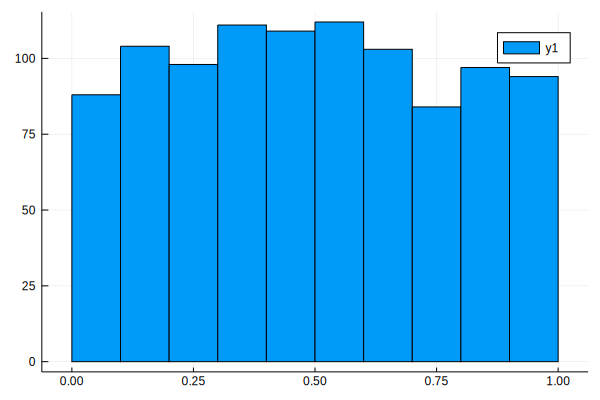

In [256]:
using Plots

histogram(rand(1000))

下面範例是加入 range 定義，產生 10 個 1 到 100 之間的隨機數字。

In [257]:
rand(1:100, 10)

10-element Array{Int64,1}:
  31
  35
  35
  40
  89
 100
  53
  92
  45
  83

產生隨機常態分布數字。

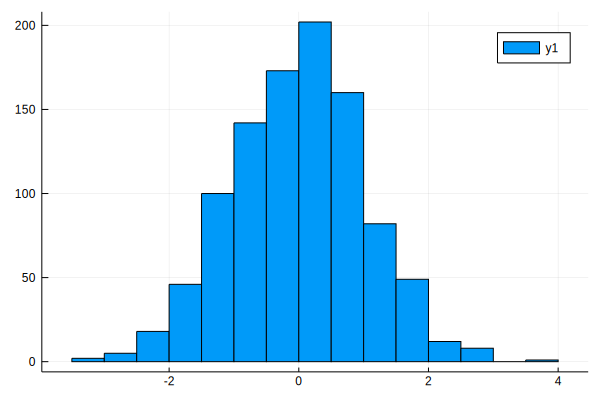

In [258]:
histogram(randn(1000))

產生隨機指數分布數字。`randexp()` 預設的數值型別也是 `Float64`。

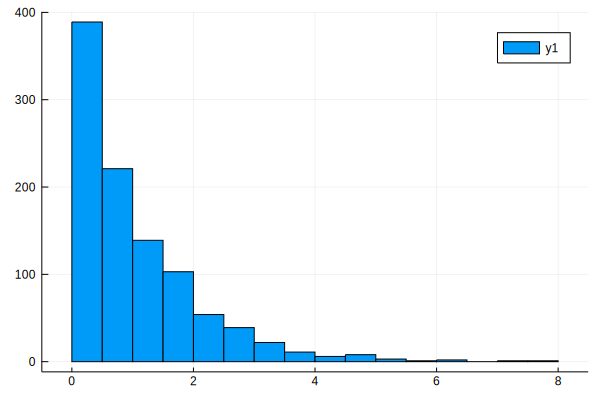

In [259]:
using Random

histogram(randexp(1000))